In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
data_dir = r"D:\2022BE Projects\Driver Drwsiness\Drowsiness\train"

In [4]:
batch_size = 32
img_height = 200
img_width = 200

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1234 files belonging to 2 classes.
Using 988 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1234 files belonging to 2 classes.
Using 246 files for validation.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1234 files belonging to 2 classes.
Using 246 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Closed', 'Open']


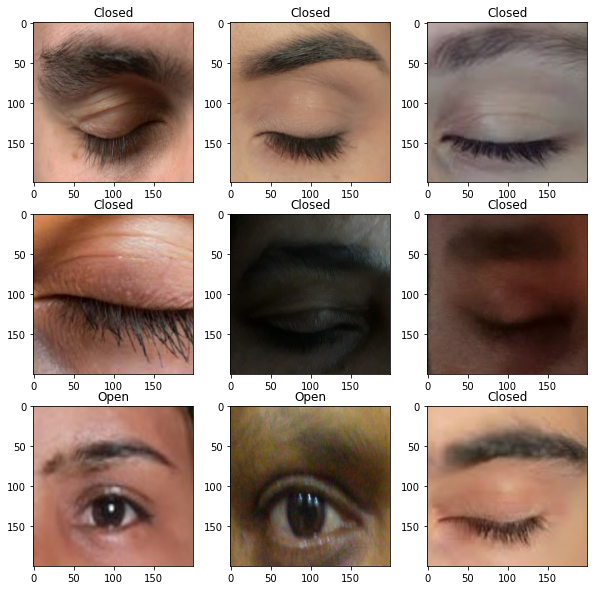

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32,)


In [11]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.999706


In [13]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(6)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
31/31 [==============================] - 42s 1s/step - loss: 0.6857 - accuracy: 0.6518 - val_loss: 0.3108 - val_accuracy: 0.8902
Epoch 2/10
31/31 [==============================] - 35s 1s/step - loss: 0.2363 - accuracy: 0.9099 - val_loss: 0.1344 - val_accuracy: 0.9512
Epoch 3/10
31/31 [==============================] - 35s 1s/step - loss: 0.1209 - accuracy: 0.9575 - val_loss: 0.1198 - val_accuracy: 0.9593
Epoch 4/10
31/31 [==============================] - 36s 1s/step - loss: 0.1472 - accuracy: 0.9453 - val_loss: 0.1297 - val_accuracy: 0.9756
Epoch 5/10
31/31 [==============================] - 35s 1s/step - loss: 0.1180 - accuracy: 0.9585 - val_loss: 0.1516 - val_accuracy: 0.9390
Epoch 6/10
31/31 [==============================] - 36s 1s/step - loss: 0.1230 - accuracy: 0.9585 - val_loss: 0.1468 - val_accuracy: 0.9553
Epoch 7/10
31/31 [==============================] - 35s 1s/step - loss: 0.0679 - accuracy: 0.9757 - val_loss: 0.0937 - val_accuracy: 0.9715
Epoch 8/10
31/31 [==

In [17]:
test_data = r""
test_data_path = test_data

img = keras.preprocessing.image.load_img(
    test_data_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {}"
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 423ms/step
This image most likely belongs to Closed


In [18]:
test_data = r""
test_data_path = test_data

img = keras.preprocessing.image.load_img(
    test_data_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {}"
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to Closed


In [19]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    images_dir, # Put your path here
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

NameError: name 'ImageDataGenerator' is not defined

In [ ]:
import numpy as np
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    images_dir, # Put your path here
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)